In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/DL_BAL_DATASET.csv')
df.head()

,rating,review
0,5,good
1,4,good
2,4,supervising the manufacturing the processes en...
3,1,terrible
4,4,it could be so good but it isnt


In [ ]:
df.columns

Index(['rating', 'review'], dtype='object')

In [ ]:
df['review']=df['review'].astype(str).str.lower()

In [ ]:
df.shape

(3997104, 2)

In [ ]:
df['rating'].value_counts()

,count
rating,
4,1093902
3,1002814
5,858879
2,556751
1,484758


In [ ]:
n = 8
for rating in range(1, 6):
    filtered_reviews = df[df['rating'] == rating]['review'].dropna()
    sample_reviews = filtered_reviews.sample(n=min(n, len(filtered_reviews)), random_state=rating)

    # Print results
    print(f"\nShowing {min(n, len(filtered_reviews))} sample review(s) for Rating {rating}:\n")
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review.strip()}\n")


Showing 8 sample review(s) for Rating 1:

1. big bad

2. please think carefully

3. out of touch with what really drives employees

4. gateway edi wish i could find another job fast

5. inspiring challenging then painstakingly tried to keep up with the demands of an impossible goal

6. if youre salesoriented apply elsewhere

7. revolving door for management and a lack of employee recognition

8. very redeeming features


Showing 8 sample review(s) for Rating 2:

1. huge permainterviewers

2. unrealistic expectations are causing too many talented people to leave

3. my exeperience at best buy

4. mixed opinion

5. no promotion

6. waning talent

7. warehouse opperative

8. hard work with little pay


Showing 8 sample review(s) for Rating 3:

1. its a serving job

2. good company to initiate career and learning

3. good bank to work at

4. be prepared to work hard

5. okay company not that great in terms of learning

6. advisor position at previous job

7. entry sales position with tell

In [ ]:
short_counts = df[df['review'].apply(lambda x: len(str(x).split()) < 3)] \
                .groupby('rating').size().reset_index(name='count_less_than_3_words')

print(short_counts)
long_counts = df[df['review'].apply(lambda x: len(str(x).split()) > 50)] \
               .groupby('rating').size().reset_index(name='count_long_reviews')

print(long_counts)

   rating  count_less_than_3_words
0       1                    77776
1       2                    90180
2       3                   163784
3       4                   175238
4       5                   158229
   rating  count_long_reviews
0       1                  29
1       2                  14
2       3                  11
3       4                   5
4       5                   6


TRAIN TEST SPLIT

In [ ]:

from sklearn.model_selection import train_test_split

# Suppose 'df' has columns: 'review' and 'rating'

# Features (X) and labels (y)
X = df['review']
y = df['rating']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Optionally combine X and y back into DataFrames
train_df = pd.DataFrame({'review': X_train, 'rating': y_train})
test_df = pd.DataFrame({'review': X_test, 'rating': y_test})

LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
39972/39972 ━━━━━━━━━━━━━━━━━━━━ 614s 15ms/step - accuracy: 0.2728 - loss: 1.5633 - val_accuracy: 0.2725 - val_loss: 1.5627
Epoch 2/5
39972/39972 ━━━━━━━━━━━━━━━━━━━━ 639s 16ms/step - accuracy: 0.2743 - loss: 1.5623 - val_accuracy: 0.2725 - val_loss: 1.5627
Epoch 3/5
39972/39972 ━━━━━━━━━━━━━━━━━━━━ 628s 16ms/step - accuracy: 0.2743 - loss: 1.5621 - val_accuracy: 0.2725 - val_loss: 1.5628
Epoch 4/5
39972/39972 ━━━━━━━━━━━━━━━━━━━━ 684s 16ms/step - accuracy: 0.2737 - loss: 1.5626 - val_accuracy: 0.2725 - val_loss: 1.5629
Epoch 5/5
39972/39972 ━━━━━━━━━━━━━━━━━━━━ 683s 16ms/step - accuracy: 0.2743 - loss: 1.5622 - val_accuracy: 0.2725 - val_loss: 1.5627
24982/24982 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step
Accuracy: 0.27367307088505305

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     96952
           1       0.00      0.00      0.00    111350
           2       0.00      0.00      0.00    200563
           3

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


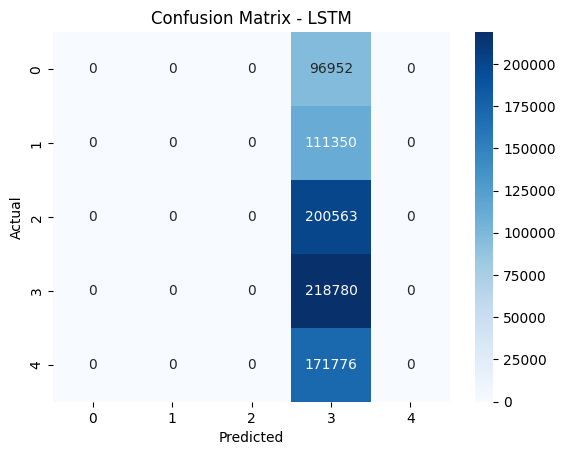

In [ ]:
# Load the dataset
df = pd.read_csv('/content/DL_BAL_DATASET.csv')

# Handle missing values in 'review' column by filling with empty strings
df['review'] = df['review'].fillna('')

# Re-perform train-test split to ensure X_train and X_test are defined
# Assuming 'df' dataframe and 'review', 'rating' columns exist from previous cells
X = df['review']
y = df['rating']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Convert y_train and y_test to numpy arrays and adjust labels to be 0-indexed
y_train = y_train.to_numpy() - 1
y_test = y_test.to_numpy() - 1

# Import necessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Tokenization & Padding
max_words = 20000   # vocab size
max_len = 200       # max length of review

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)  # X_train is raw text reviews
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

# LSTM Model
lstm_model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(len(set(y_train)), activation="softmax")  # multi-class
])

lstm_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

# Train
history = lstm_model.fit(X_train_pad, y_train,
                         epochs=5,
                         batch_size=64,
                         validation_split=0.2,
                         verbose=1)

# Predict
y_pred_probs = lstm_model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LSTM")
plt.show()

Bi LSTM

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,659,461 (10.15 MB)

 Trainable params: 2,659,461 (10.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 313s 20ms/step - accuracy: 0.4180 - loss: 1.2896 - val_accuracy: 0.4417 - val_loss: 1.2332
Epoch 2/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 310s 20ms/step - accuracy: 0.4485 - loss: 1.2250 - val_accuracy: 0.4457 - val_loss: 1.2257
Epoch 3/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 329s 20ms/step - accuracy: 0.4578 - loss: 1.2066 - val_accuracy: 0.4463 - val_loss: 1.2250
Epoch 4/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 314s 20ms/step - accuracy: 0.4643 - loss: 1.1935 - val_accuracy: 0.4460 - val_loss: 1.2258
Epoch 5/5
15253/15253 ━━━━━━━━━━━━━━━━━━━━ 297s 19ms/step - accuracy: 0.4708 - loss: 1.1814 - val_accuracy: 0.4446 - val_loss: 1.2301
16948/16948 ━━━━━━━━━━━━━━━━━━━━ 87s 5ms/step
Accuracy: 0.4464
Classification Report:

              precision    recall  f1-score   support

           1       0.59      0.36      0.45     54232
           2       0.42      0.25      0.32     81348
           3       0.41      0.40      0.41    135580
           4       0.42   

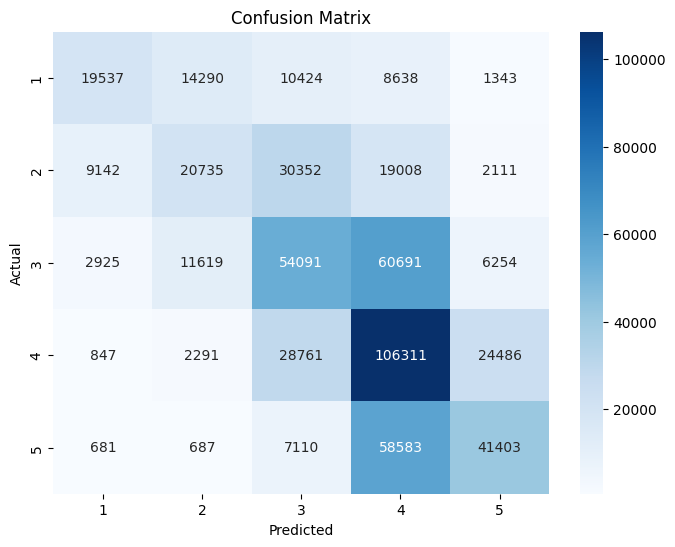

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the dataframe
df=pd.read_csv('/content/drive/MyDrive/DL_IM_dataset.csv')

# ----------------------
# Prepare data
# ----------------------
# Convert 'review' column to string and fill potential NaN values
df['review'] = df['review'].astype(str).fillna('')

X = df['review']
y = df['rating']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical,
    test_size=0.2,
    stratify=y_categorical,
    random_state=42
)

# Tokenization and padding
max_words = 20000
max_len = 150

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# ----------------------
# Build BiLSTM Model
# ----------------------
embedding_dim = 128
lstm_units = 64
num_classes = y_categorical.shape[1]

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(lstm_units)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Build model to show correct summary
model.build(input_shape=(None, max_len))
model.summary()

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ----------------------
# Train Model
# ----------------------
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)

# ----------------------
# Evaluate Model
# ----------------------
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.4f}")

# Precision, Recall, F1-Score
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=[str(i) for i in le.classes_]))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

CROSS TEST

SAVING THE MODEL

In [ ]:
model.save('Model_B.h5')

In [ ]:
import pickle
with open('tokenizer2.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# 3. Save Label Encoder
with open('label_encoder2.pkl', 'wb') as f:
    pickle.dump(le, f)

MODEL A ON BALANCED DATASET

24982/24982 ━━━━━━━━━━━━━━━━━━━━ 129s 5ms/step
Accuracy: 0.4602768753885625

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.39      0.49     96952
           2       0.39      0.36      0.37    111350
           3       0.45      0.39      0.42    200563
           4       0.40      0.65      0.50    218780
           5       0.61      0.41      0.49    171776

    accuracy                           0.46    799421
   macro avg       0.51      0.44      0.45    799421
weighted avg       0.49      0.46      0.46    799421



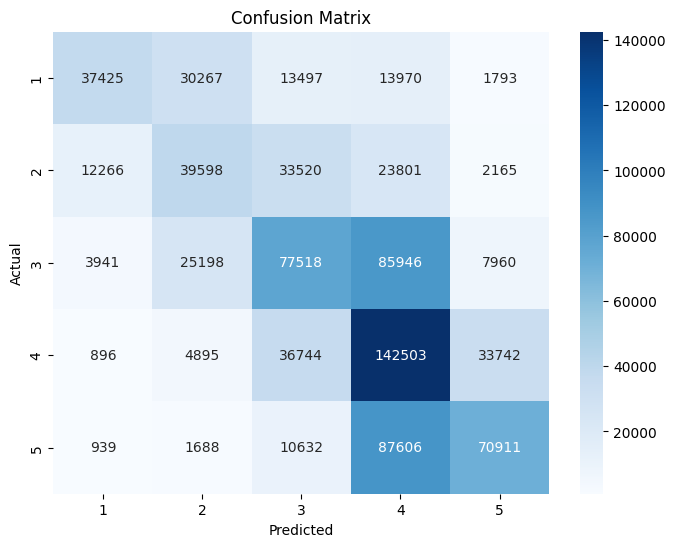

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle




X = df['review']
y = df['rating']

with open('label_encoder.pkl', 'rb') as f:
    le = pickle.load(f)
y_encoded = le.fit_transform(y)

# --- Stratified split ---
X_train, X_test, y_train_raw, y_test_raw = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# --- One-hot encode (if needed for model) ---
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test_raw)

# --- Load model and tokenizer and label encoder ---
model = load_model('Model_A.h5')

with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)





# --- Prepare test data ---
max_len = 150  # must match training
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# --- Predict ---
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test_raw   # original label numeric

# --- Evaluation Metrics ---
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_.astype(str)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [3]:
df.to_csv(' DL BALANCED_TRAIN_TEST.csv',index=False)